In [2]:
COLAB = True

# **Importing dataset from drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing libraries**

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.python.client import device_lib
from keras.utils.vis_utils import model_to_dot


from IPython.display import SVG
from PIL import Image
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

tf.test.gpu_device_name()
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7779668348817570377
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12264982352754239026
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

# **Checking the number of files**

In [5]:
totalFiles = 0
totalDir = 0
PATH = '/content/drive/MyDrive/Dataa'

for base, dirs, files in os.walk(PATH):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /content/drive/MyDrive/Dataa
Searching in :  /content/drive/MyDrive/Dataa/Test
Searching in :  /content/drive/MyDrive/Dataa/Test/water
Searching in :  /content/drive/MyDrive/Dataa/Test/cloudy
Searching in :  /content/drive/MyDrive/Dataa/Test/desert
Searching in :  /content/drive/MyDrive/Dataa/Test/green_area
Searching in :  /content/drive/MyDrive/Dataa/Train
Searching in :  /content/drive/MyDrive/Dataa/Train/water
Searching in :  /content/drive/MyDrive/Dataa/Train/cloudy
Searching in :  /content/drive/MyDrive/Dataa/Train/green_area
Searching in :  /content/drive/MyDrive/Dataa/Train/desert
Total number of files 2080
Total Number of directories 10
Total: 2090


# **Accessing images of each class**

(64, 64)


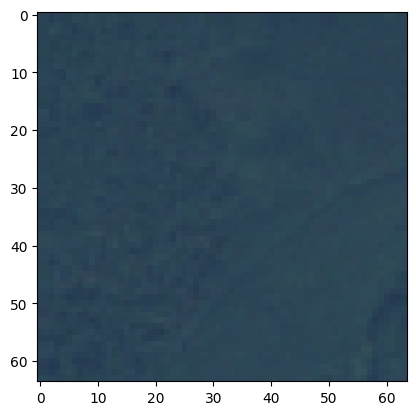

In [6]:
# green_area

img = Image.open("/content/drive/MyDrive/Dataa/Train/green_area/Forest_205.jpg")
print(img.size)
plt.imshow(img)

(256, 256)


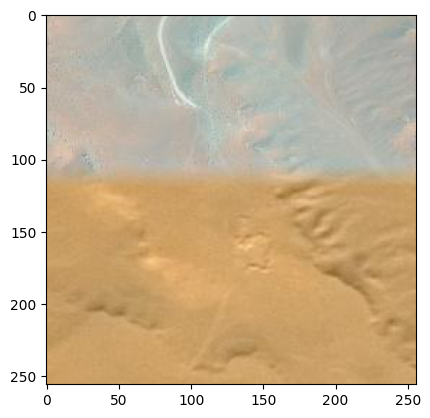

In [7]:
# desert

img = Image.open("/content/drive/MyDrive/Dataa/Train/desert/desert(104).jpg")
print(img.size)
plt.imshow(img)
     

(256, 256)


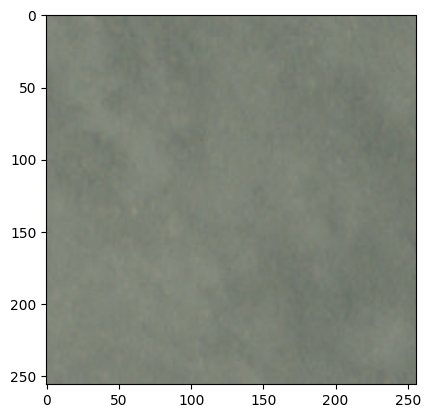

In [8]:
# cloudy

img = Image.open("/content/drive/MyDrive/Dataa/Train/cloudy/train_10173.jpg")
print(img.size)
plt.imshow(img)
     

(64, 64)


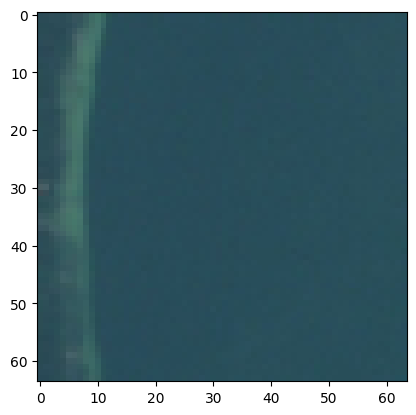

In [9]:
# water

img = Image.open("/content/drive/MyDrive/Dataa/Train/water/SeaLake_102.jpg")
print(img.size)
plt.imshow(img)


# **Data augmentation**

In [10]:
BATCH_SIZE = 32
IMAGE_SIZE = 150

# this is the augmentation configuration we will use just for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for validation:
# only for rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# this is the augmentation configuration we will use for testing:
# only for rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataa/Train',  # this is the target directory
        target_size=(IMAGE_SIZE, IMAGE_SIZE),  # all images will be resized to 150x150
        batch_size=BATCH_SIZE,
        class_mode='categorical')

# # this is a similar generator, for validation data
# validation_generator = validation_datagen.flow_from_directory(
#         'dataset/validation/', #this is the validation directory
#         target_size=(IMAGE_SIZE, IMAGE_SIZE),
#         batch_size=BATCH_SIZE,
#         class_mode='categorical')

# this is a similar generator, for test data
test_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataa/Test', #this is the validation directory
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 2000 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


# **Creating model layers**

In [11]:
keras.backend.clear_session() #clear model numbers

input_layer = keras.layers.Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3))

#CNN - Convolutional Layers - Block1
conv_layer = keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_layer)
conv_layer = keras.layers.Conv2D(16, (3,3), activation="relu", padding="same")(conv_layer)
pooling_layer = keras.layers.MaxPool2D(pool_size=(2,2))(conv_layer)

#FC - Fully connected
flatten = keras.layers.Flatten()(pooling_layer)
dense = keras.layers.Dense(200, activation="relu")(flatten)
dropout = keras.layers.Dropout(0.5)(dense)

classifier = keras.layers.Dense(4, activation="softmax")(dropout)

model = keras.Model(inputs=input_layer, outputs=classifier)
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 90000)             0         
                                                                 
 dense (Dense)               (None, 200)               18000200  
                                                             

# **Displaying Model workflow**

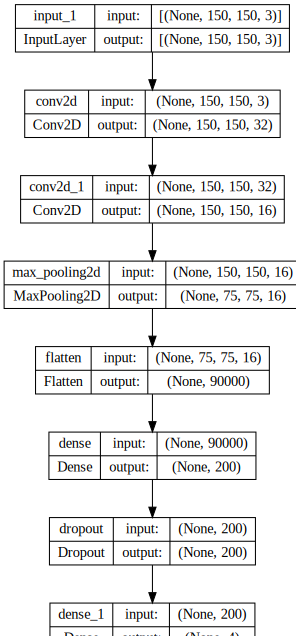

In [12]:
if COLAB:
    display(SVG(model_to_dot(model, show_shapes=True,dpi=70).create(prog='dot', format='svg')))
else:
    display(SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')))

# **Model training**

In [13]:
history1 = model.fit(train_generator, epochs=20)

Epoch 1/20
63/63 [==============================] - 524s 8s/step - loss: 1.1849 - accuracy: 0.6550
Epoch 2/20
63/63 [==============================] - 15s 238ms/step - loss: 0.5317 - accuracy: 0.7380
Epoch 3/20
63/63 [==============================] - 15s 237ms/step - loss: 0.4546 - accuracy: 0.7940
Epoch 4/20
63/63 [==============================] - 15s 243ms/step - loss: 0.3837 - accuracy: 0.8500
Epoch 5/20
63/63 [==============================] - 16s 251ms/step - loss: 0.3635 - accuracy: 0.8640
Epoch 6/20
63/63 [==============================] - 16s 252ms/step - loss: 0.3782 - accuracy: 0.8665
Epoch 7/20
63/63 [==============================] - 17s 264ms/step - loss: 0.4036 - accuracy: 0.8515
Epoch 8/20
63/63 [==============================] - 15s 241ms/step - loss: 0.3230 - accuracy: 0.8890
Epoch 9/20
63/63 [==============================] - 15s 243ms/step - loss: 0.3256 - accuracy: 0.8865
Epoch 10/20
63/63 [==============================] - 15s 245ms/step - loss: 0.3016 - accuracy

# **Checking accuracy of training and test dataset**

In [14]:
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])


scores_tr = model.evaluate(test_generator)
print('Test loss    :', scores_tr[0])
print('Test accuracy:', scores_tr[1])
     

63/63 [==============================] - 15s 233ms/step - loss: 0.2718 - accuracy: 0.9140
Train loss    : 0.27184730768203735
Train accuracy: 0.9139999747276306
3/3 [==============================] - 16s 8s/step - loss: 1.1383 - accuracy: 0.6875
Test loss    : 1.138257384300232
Test accuracy: 0.6875


# **Prediciting results**

In [15]:
indices = train_generator.class_indices
print(indices)

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}


1/1 [==============================] - 0s 222ms/step
Real: desert ,Predicted: desert


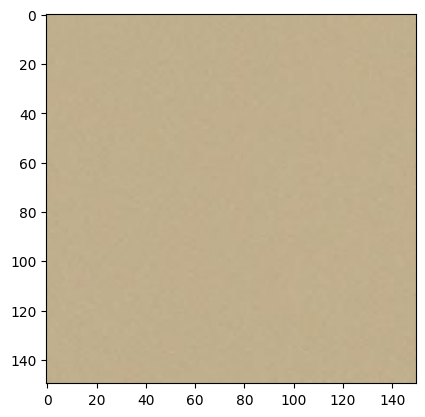

In [16]:
path = '/content/drive/MyDrive/Dataa/Test/desert/desert(1073).jpg'
img=load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)

max_value = max(classes[0])
max_index = list(classes[0]).index(max_value)

np.around(classes[0], decimals = 2)
print('Real: desert', ',Predicted:',list(indices.keys())[max_index])

1/1 [==============================] - 0s 19ms/step
Real: cloudy ,Predicted: cloudy


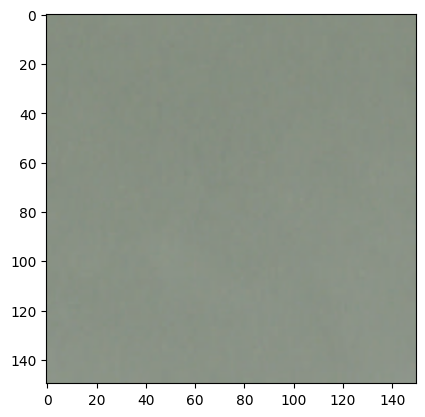

In [17]:
path = '/content/drive/MyDrive/Dataa/Test/cloudy/train_39892.jpg'
img=load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)

max_value = max(classes[0])
max_index = list(classes[0]).index(max_value)

np.around(classes[0], decimals = 2)
print('Real: cloudy', ',Predicted:',list(indices.keys())[max_index])

1/1 [==============================] - 0s 20ms/step
Real: water ,Predicted: water


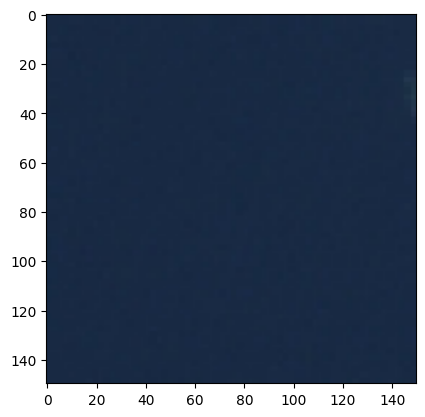

In [21]:
path = '/content/drive/MyDrive/Dataa/Test/water/SeaLake_2955.jpg'
img=load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
x=img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)

max_value = max(classes[0])
max_index = list(classes[0]).index(max_value)

np.around(classes[0], decimals = 2)
print('Real: water', ',Predicted:',list(indices.keys())[max_index])